In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Pre Processing

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df.Gender=le.fit_transform(df['Gender'])

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### Outliers

<Axes: >

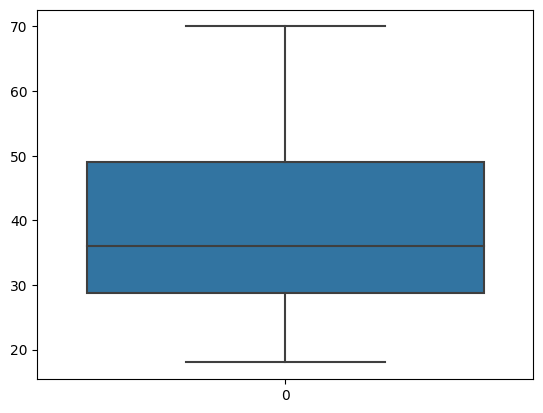

In [11]:
sns.boxplot(df.Age)

<Axes: >

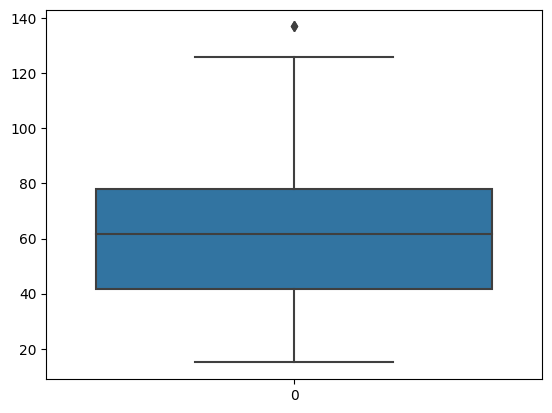

In [13]:
sns.boxplot(df['Annual Income (k$)'])

In [20]:
q1=df['Annual Income (k$)'].quantile(0.25)
q2=df['Annual Income (k$)'].quantile(0.75)
IQR=q2-q1
IQR=q2-q1
lower=q1-1.5*IQR
upper=q2+1.5*IQR
df['Annual Income (k$)'].median()
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper,df['Annual Income (k$)'].median(),df['Annual Income (k$)'])

<Axes: >

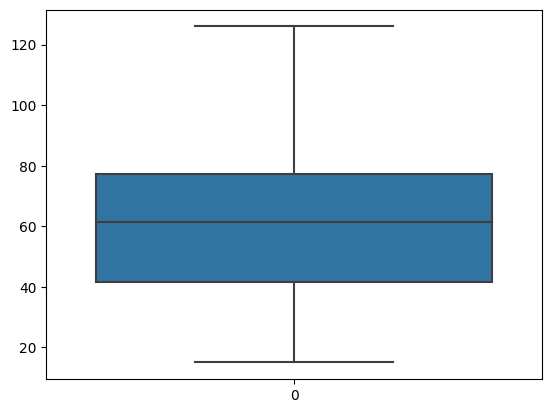

In [23]:
sns.boxplot(df['Annual Income (k$)'])

In [64]:
df=df.drop(columns='CustomerID',axis=1)

In [65]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.418919,0.173469


### Correlation

In [66]:
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.024997,-0.058109
Age,0.060867,1.000000,0.004013,-0.327227
Annual Income (k$),0.024997,0.004013,1.000000,0.010007
Spending Score (1-100),-0.058109,-0.327227,0.010007,1.000000


<Axes: >

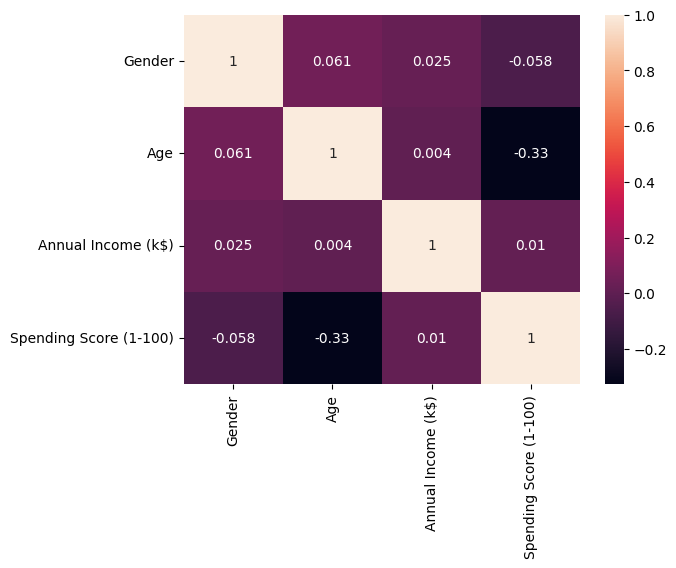

In [67]:
sns.heatmap(df.corr(),annot=True)

### Scaling Dataset

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scale=MinMaxScaler()

In [70]:
df=pd.DataFrame(scale.fit_transform(df),columns=df.columns)

In [71]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [72]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,0.400962,0.403649,0.502041
std,0.497633,0.268635,0.226223,0.263505
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.206731,0.238739,0.344388
50%,0.000000,0.346154,0.416667,0.500000
75%,1.000000,0.596154,0.560811,0.734694
max,1.000000,1.000000,1.000000,1.000000


### K Means Clustering Algorithm

In [73]:
from sklearn import cluster

In [74]:
error=[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

In [75]:
error

[87.64248645238288,
 38.256261727718474,
 30.53615452035329,
 23.37397528270042,
 20.102172077784854,
 17.128172918518985,
 14.850573520364884,
 12.608723763869852,
 10.917668890407121,
 9.591940516007265]

Text(0.5, 1.0, 'Elbow Method')

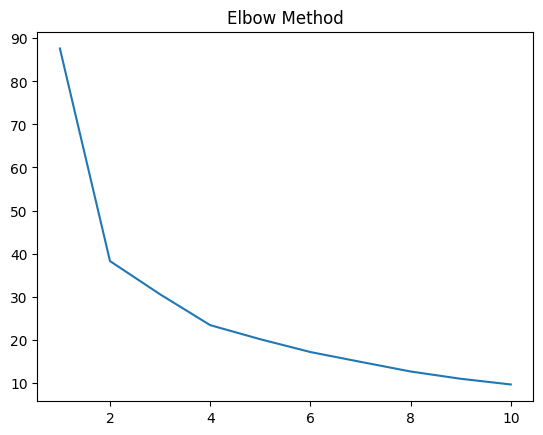

In [76]:
plt.plot(range(1,11),error)
plt.title('Elbow Method')

## K=4

In [77]:
km_model = cluster.KMeans(n_clusters=4,init = 'k-means++',random_state=0)

In [78]:
km_model.fit(df)

C:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [79]:
y_pred = km_model.predict(df)
y_pred

array([3, 3, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3])

### Random Prediction

In [83]:
print(km_model.predict([[1,21,35,39]]))

[3]


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [89]:
print(km_model.predict([[1,23,16,77]]))

[3]


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
